### If the data is missing rather than removing rows here we are going to fill those missing values with something

### There are two ways to do it--
1) Univariate(when we are performing statistical thing in only column only)
2) Multivariate(when we are using more than one column values to fill the value)(KNN and Iterative)

### Univariate 
there are multiple ways to do it like mean/median, atrribute value, end of distribution, random sample imputation

### 1)Mean/Median
1) ***if the data is normally distributed then use Mean***
2) ***if the data is skewed then median is advisable***

#### Disadvantage of Mean/Median
1) distribution changes
2) outliers(it adds)
3) covariance/correlation changes

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [8]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [11]:
X = df.drop(columns=['Survived'])
y = df.Survived

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [17]:
mean_age, median_age

(29.78590425531915, 28.75)

In [18]:
mean_fare, median_fare

(32.61759689349112, 14.4583)

#### now we will create a new dataframe(and new columns) which has these mean and median values instead of empty

In [20]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [21]:
X_train.head()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458


In [23]:
# just checking those rows which has empty Age
X_train[X_train['Age'].isnull()]

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
77,NaN,8.0500,0,29.785904,28.75,8.050000,8.0500
868,NaN,9.5000,0,29.785904,28.75,9.500000,9.5000
334,NaN,133.6500,1,29.785904,28.75,133.650000,133.6500
295,NaN,27.7208,0,29.785904,28.75,27.720800,27.7208
792,NaN,69.5500,10,29.785904,28.75,69.550000,69.5500
...,...,...,...,...,...,...,...
674,NaN,0.0000,0,29.785904,28.75,0.000000,0.0000
466,NaN,NaN,0,29.785904,28.75,32.617597,14.4583
584,NaN,8.7125,0,29.785904,28.75,8.712500,8.7125
527,NaN,221.7792,0,29.785904,28.75,221.779200,221.7792


In [24]:
X_train['Age'].isnull().sum()

148

#### Now checking if all the disadvantages we have are they applying on this or not

In [25]:
# first we will find out the variance

In [32]:
print("original variance of age column",X_train.Age.var())
print("variance of mean age column",X_train['Age_mean'].var())
print(" variance of median age column",X_train.Age_median.var())
print()
print("original variance of Fare column",X_train.Fare.var())
print("variance of mean fare column",X_train.Fare_mean.var())
print("variance of median fare column",X_train.Fare_median.var())

original variance of age column 204.3495133904614
variance of mean age column 161.81262452718673
 variance of median age column 161.9895663346054

original variance of Fare column 2448.197913706318
variance of mean fare column 2324.2385256705547
variance of median fare column 2340.0910219753637


#### Now checking if the distribution changes

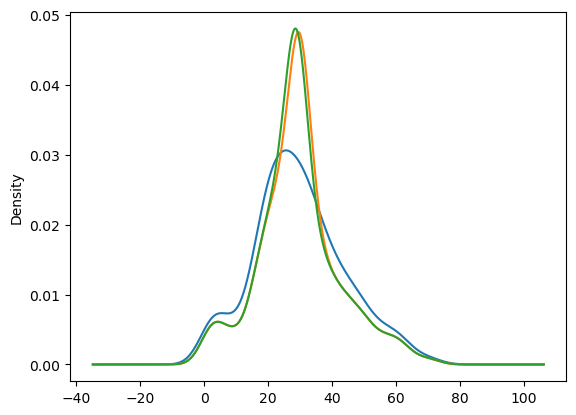

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train.Age.plot(kind='kde', ax=ax)

X_train.Age_mean.plot(kind='kde', ax=ax)

X_train.Age_median.plot(kind='kde', ax=ax);

In [38]:
# there is a change in distribution in age column when replaced with mean/median

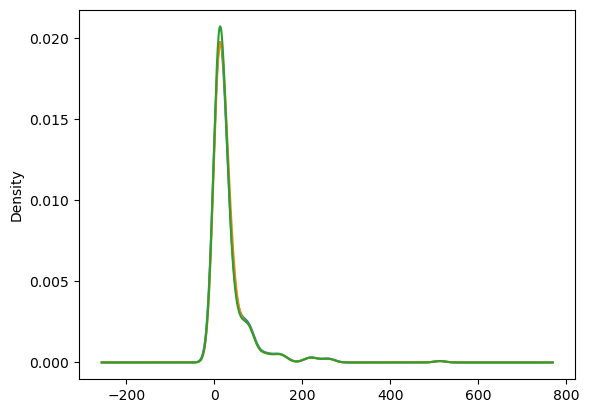

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train.Fare.plot(kind='kde', ax=ax)

X_train.Fare_mean.plot(kind='kde', ax=ax)

X_train.Fare_median.plot(kind='kde', ax=ax);

In [39]:
# there is no change in distribution in Fare column even after adding mean/median in place of null values

#### Now checking if the covariance changes(relation of one column with other column)

In [40]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [41]:
# covarince also changes when replaced with mean/median values

#### plotting box plot to see if there any outliers added after replacing null values

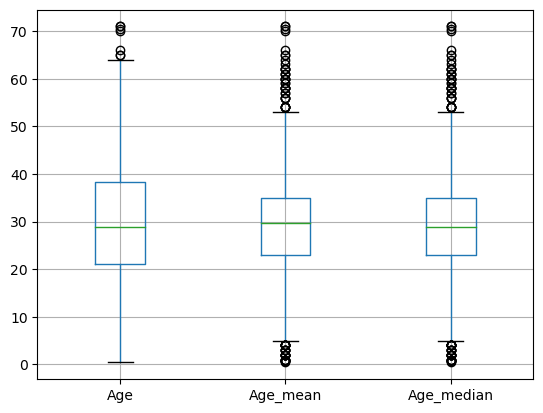

In [45]:
X_train[['Age','Age_mean','Age_median']].boxplot();

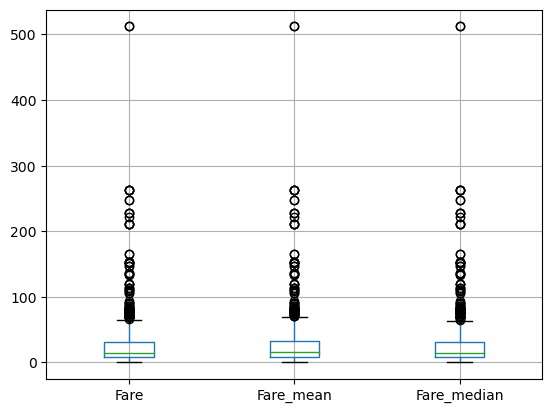

In [46]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot();

#### For age column there is no benefit in using mean/median but for Fare column we can use mean/median to replace null values

### How to do the same using Sklearn

In [52]:
# here we will use SimpleImputer
# 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
X_train.head()

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0


In [54]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [55]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])],
    remainder='passthrough')

In [56]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [57]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [58]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [59]:
trf.named_transformers_['imputer2'].statistics_

array([14.4583])

In [60]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [61]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

### We have to find the mean/median of only "TRAIN" data but when transforming we have to use the same mean/median for "TEST" data as well